# According to <a href='https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/'>Spotify Documentation</a>

**Acousticness** is a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**Danceability** describes how suitable a track is for dancing based on a combination of musical elements including **tempo**, **rhythm stability**, **beat strength**, and **overall regularity**. A value of 0.0 is least danceable and 1.0 is most danceable.

**Energy** is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel **fast**, **loud**, and **noisy**. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**Instrumentalness** predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. **Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0**. 

**Key** is the estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**Liveness** detects the presence of an audience in the recording. Higher liveness values represent an increased **probability that the track was performed live**. A value above 0.8 provides strong likelihood that the track is live

**Tempo** is the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the **speed or pace** of a given piece and derives directly from the average beat duration. 

**Valence** is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. **happy**, **cheerful**, **euphoric**), while tracks with low valence sound more negative (e.g. **sad**, **depressed**, **angry**). 

In [3]:
import pandas as pd

df = pd.read_csv('spotify_track_with_genres.csv')

In [4]:
df = df[['playlist_name','track_name','track_popularity','added_on','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','track_artist', 'time_added', 'date_added', 'hour_added']]

In [ ]:
# adding an order number to each playlist for numeric plotting below

In [ ]:
df = df.merge(pd.DataFrame([i for i in enumerate(df.sort_values(by='added_on',ascending=True).playlist_name.unique())]).rename(columns={0:'playlist_order',1:'playlist_name'}),on='playlist_name')

In [17]:
df[df.energy / df.danceability > 2.5] #these songs have relatively high "energy" compared to danceability

,playlist_name,track_name,track_popularity,added_on,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_artist,time_added,date_added,hour_added
14,Acquiesence,New Fang,54,2019-01-22T14:39:45Z,0.276,0.962,11.0,-3.797,0.0,0.0629,0.000010,0.000366,0.0327,0.741,189.898,Them Crooked Vultures,14:39:45,2019-01-22,14
48,Acquiesence,Flagpole Sitta,61,2019-02-07T14:20:39Z,0.351,0.899,7.0,-4.119,1.0,0.0432,0.001840,0.000116,0.2840,0.508,145.015,Harvey Danger,14:20:39,2019-02-07,14
200,Vitamins,Speaking Gently,47,2018-08-22T16:31:51Z,0.325,0.834,5.0,-5.015,0.0,0.0411,0.000053,0.838000,0.1120,0.511,78.198,BADBADNOTGOOD,16:31:51,2018-08-22,16
206,Vitamins,Don't Cry,47,2018-08-23T07:57:55Z,0.230,0.770,1.0,-6.349,1.0,0.3370,0.053500,0.000156,0.6440,0.588,173.442,J Dilla,07:57:55,2018-08-23,7
445,Oftenlie,Born to Shine,39,2018-01-27T05:46:37Z,0.355,0.892,7.0,-6.519,0.0,0.7010,0.019100,0.000000,0.0857,0.302,152.849,Big Grams,05:46:37,2018-01-27,5
762,Vigilante,Spinner,27,2017-08-30T13:55:49Z,0.241,0.778,5.0,-6.057,0.0,0.0539,0.010300,0.934000,0.2260,0.519,198.229,Portico Quartet,13:55:49,2017-08-30,13


In [18]:
df[df.energy / df.danceability < 0.25] #these songs have relatively low "energy" compared to danceability

,playlist_name,track_name,track_popularity,added_on,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_artist,time_added,date_added,hour_added
166,Libations,Game over!,54,2018-09-27T00:46:03Z,0.635,0.0861,11.0,-18.311,0.0,0.0755,0.358,0.00995,0.1380,0.0618,130.146,Harris Cole,00:46:03,2018-09-27,0
168,Libations,Jovial,59,2018-09-28T04:49:32Z,0.764,0.1850,7.0,-14.408,0.0,0.0489,0.918,0.92600,0.1180,0.3780,69.972,Limes,04:49:32,2018-09-28,4
175,Libations,Tulips,58,2018-10-01T19:27:51Z,0.835,0.1470,6.0,-9.837,0.0,0.3410,0.854,0.88100,0.1110,0.4690,84.048,emune,19:27:51,2018-10-01,19
192,Libations,this girl,65,2018-10-10T00:05:49Z,0.788,0.1500,8.0,-10.002,1.0,0.2470,0.895,0.87000,0.1010,0.4640,139.983,Elijah Who,00:05:49,2018-10-10,0
505,Capcom,6 8,49,2017-12-26T09:42:03Z,0.824,0.1360,0.0,-7.938,1.0,0.0588,0.894,0.00350,0.0765,0.1550,115.030,Gabriel Garzón-Montano,09:42:03,2017-12-26,9
644,Scorpion Gulch,patagonia,0,2017-11-06T20:30:54Z,0.679,0.1330,8.0,-13.636,1.0,0.1350,0.932,0.75000,0.1040,0.6230,81.935,Bilo 503,20:30:54,2017-11-06,20
932,Aruarian,#LostScrolls 1 (Bonus Track) - Instrumental,0,2017-02-13T23:39:18Z,0.828,0.1060,6.0,-14.054,1.0,0.1320,0.392,0.99000,0.1100,0.8020,95.466,J Dilla,23:39:18,2017-02-13,23


In [5]:
%matplotlib inline

# By Hour Added
---

/Users/ctirol/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


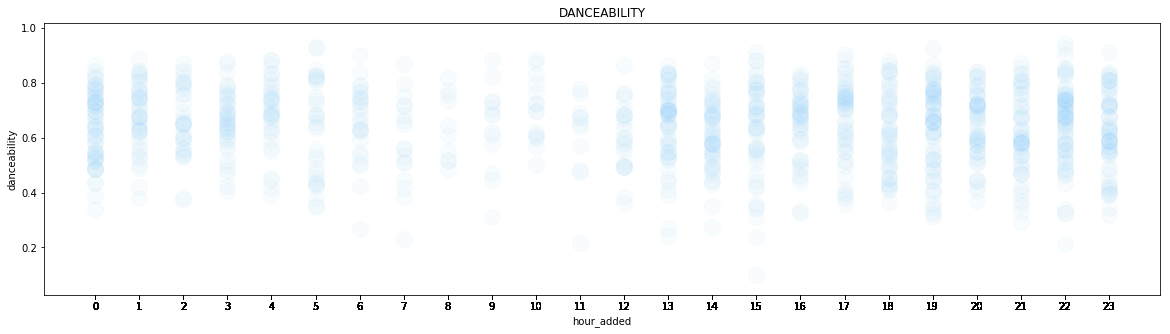

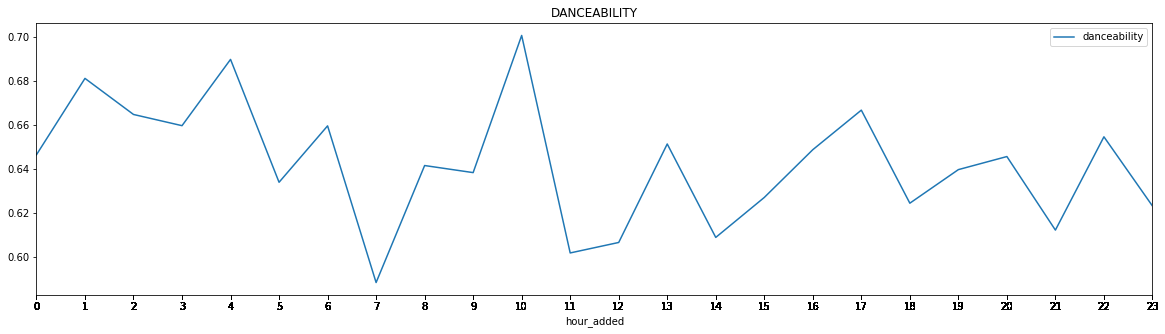

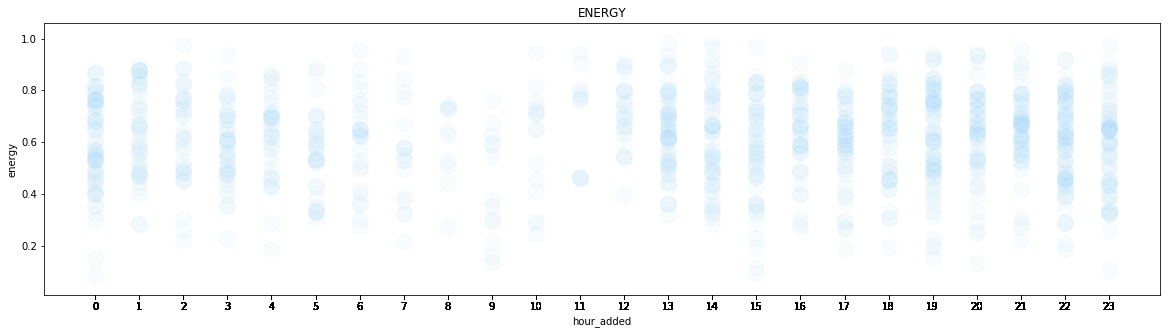

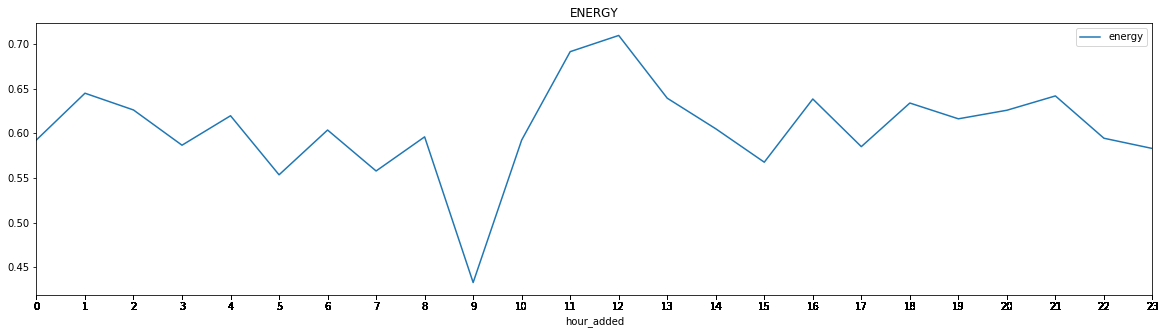

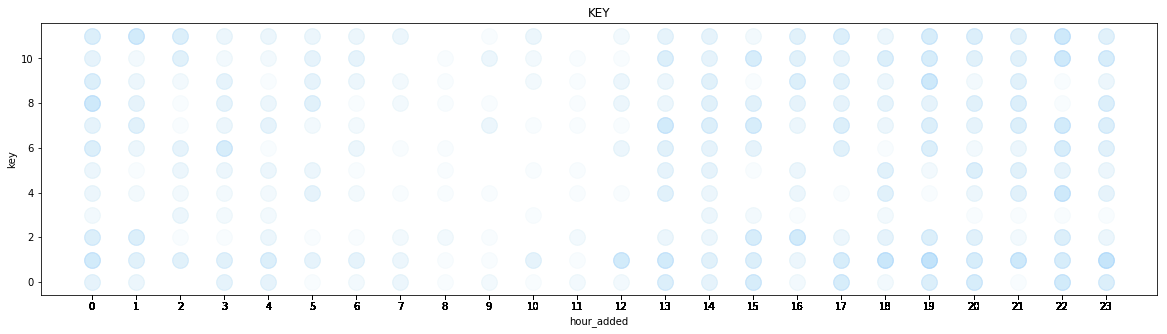

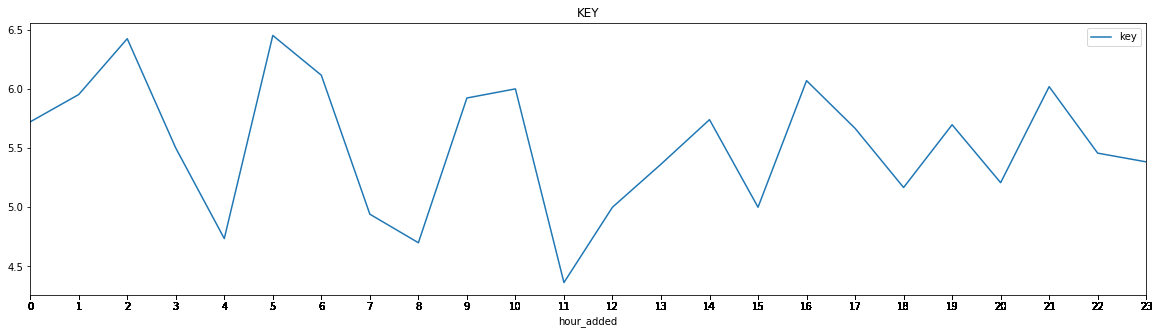

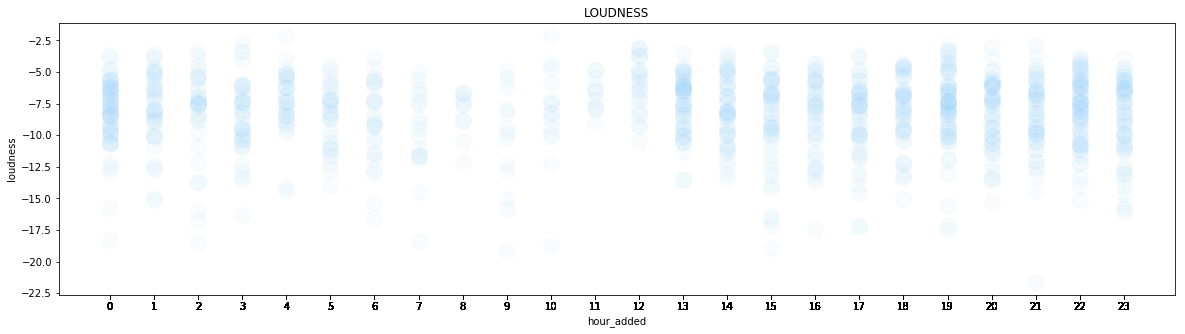

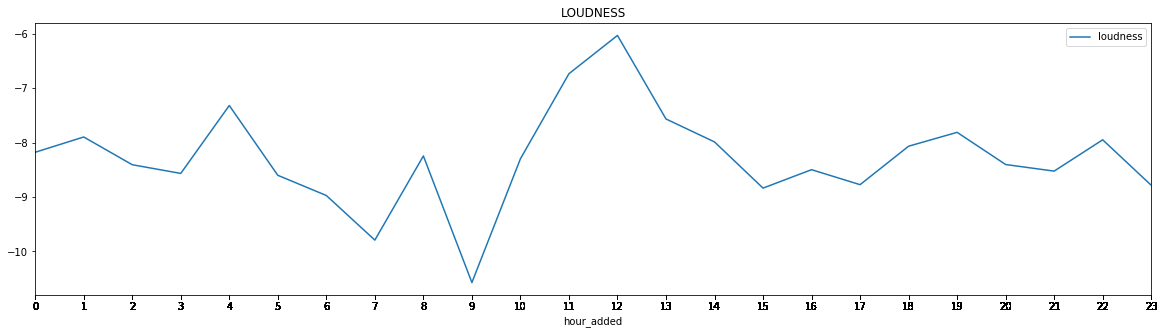

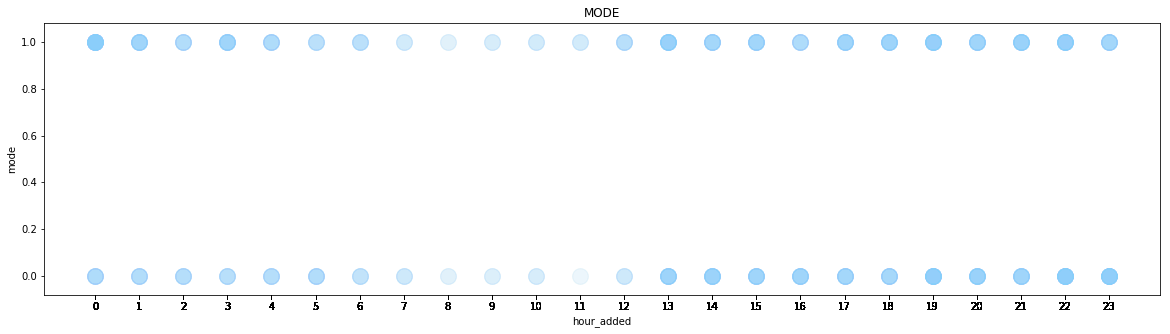

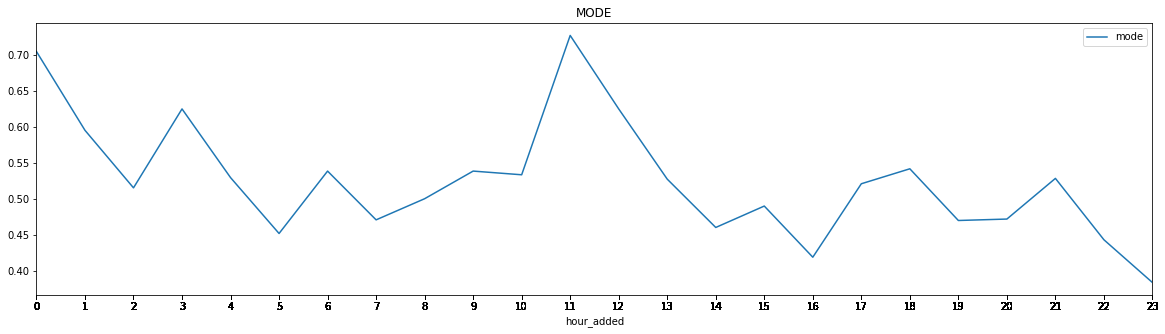

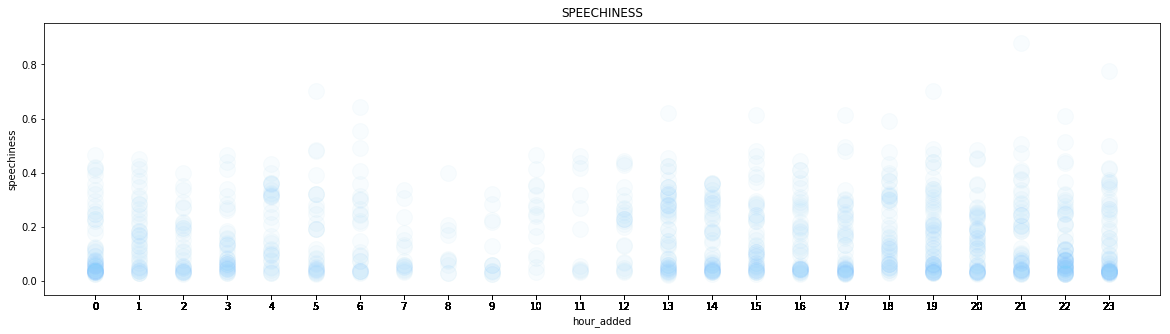

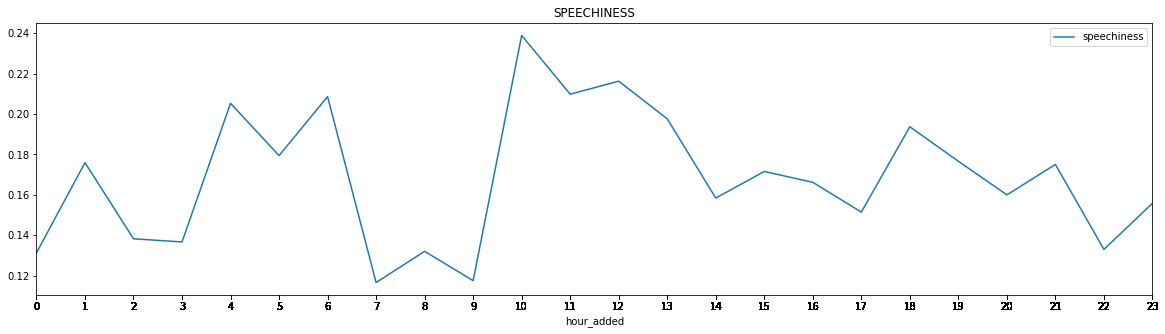

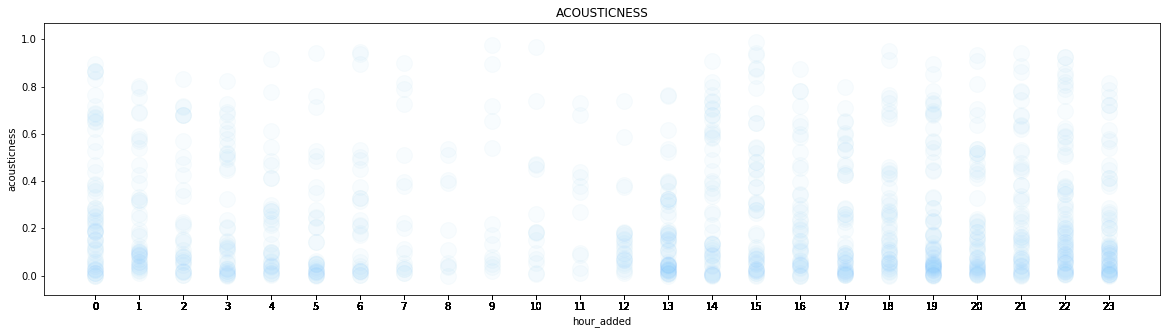

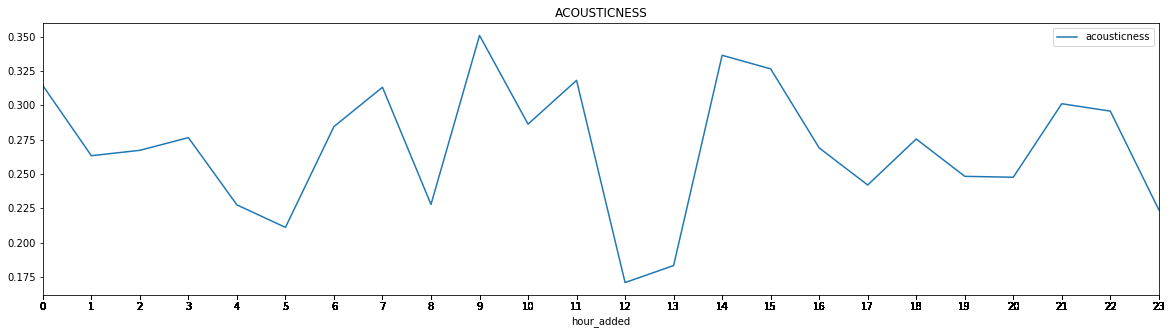

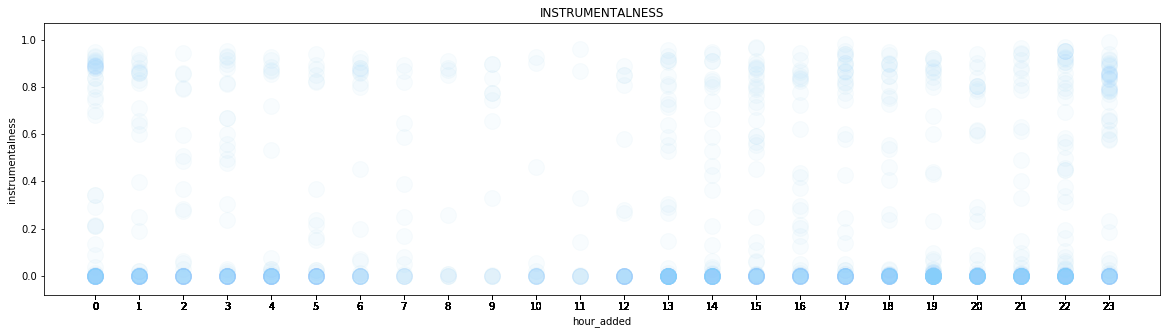

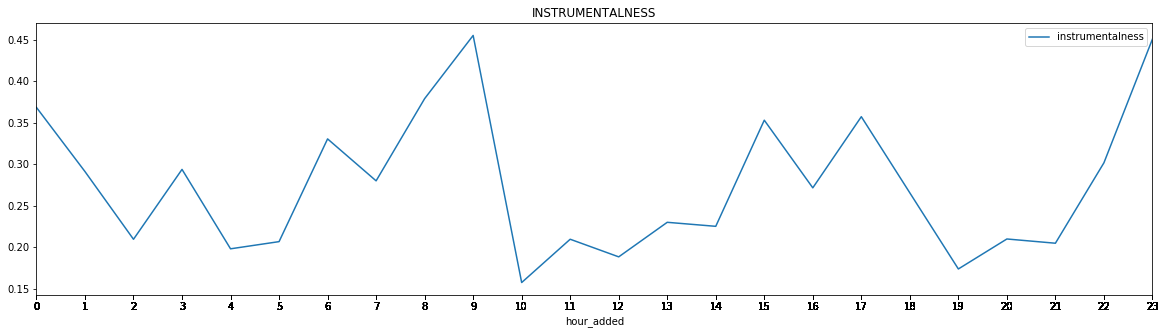

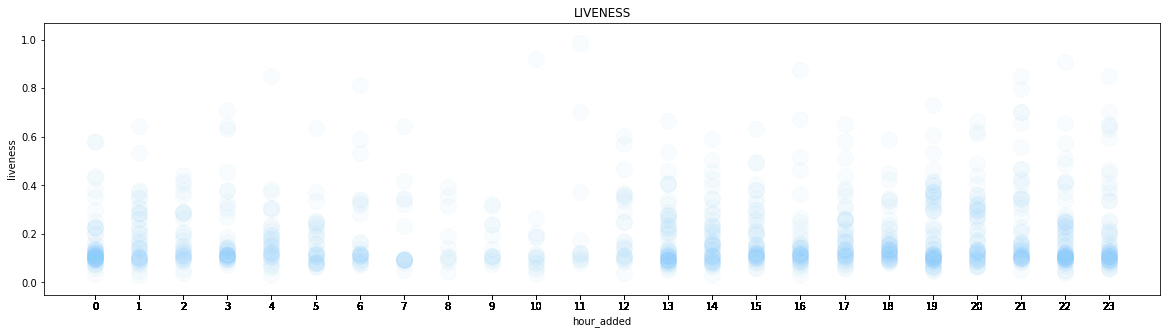

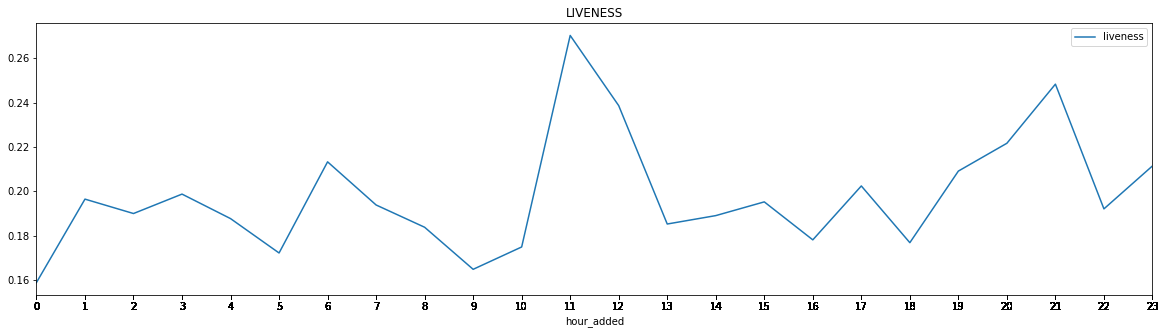

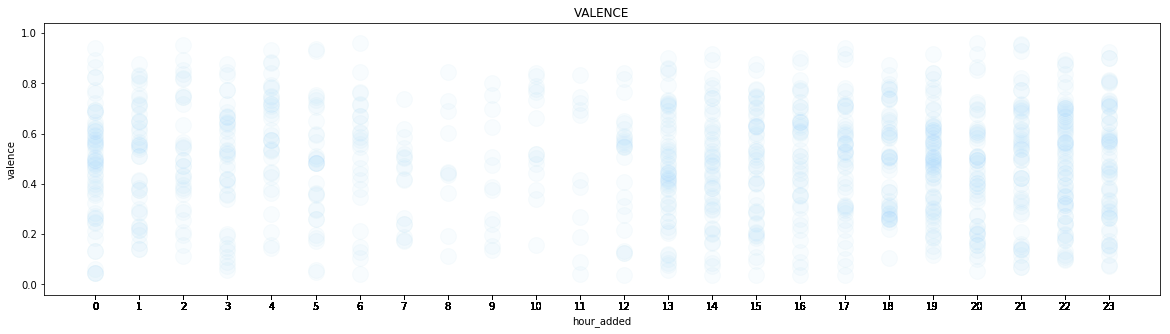

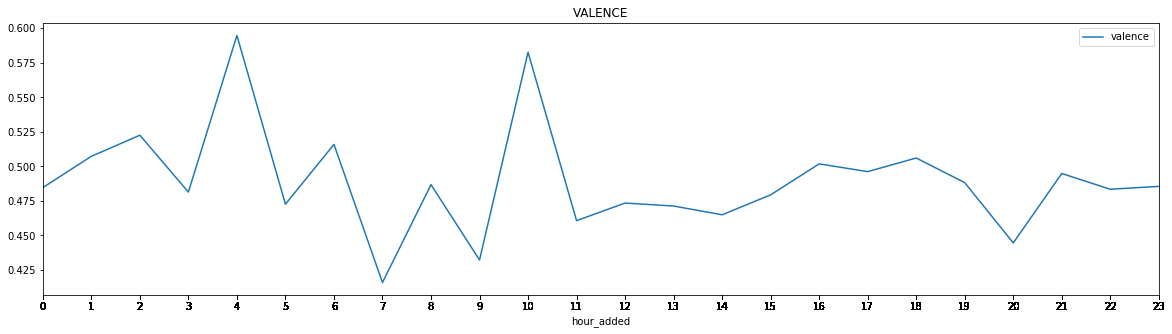

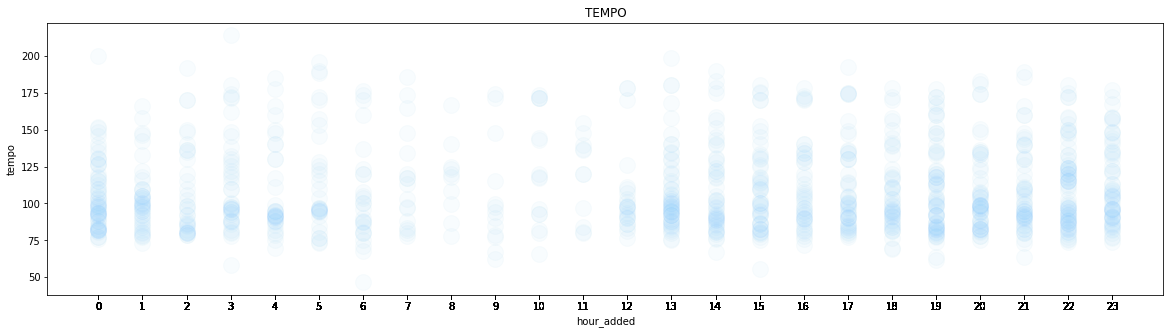

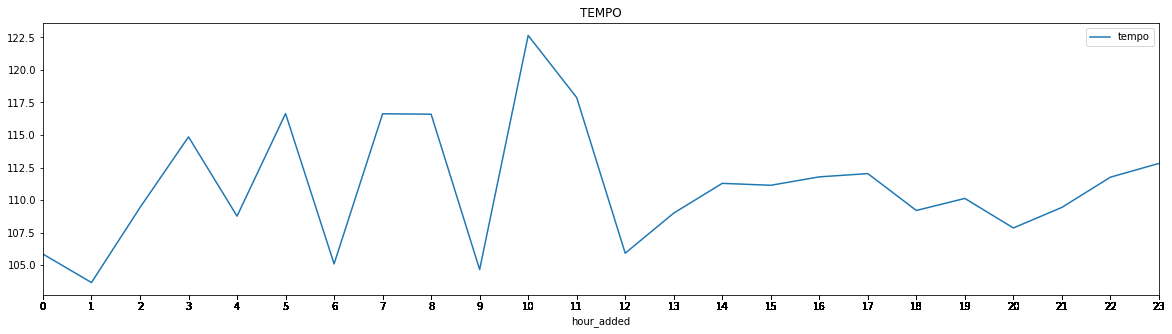

In [20]:
y = 'instrumentalness'
x = 'hour_added' #time of day

for y in ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']:
    df[[x,y]].plot(
        kind='scatter',
        y=y,
        x=x,
        figsize=(20,5),
        alpha=.05,
        c='lightskyblue',
        s=250,
        xticks=df[x],
        title=y.upper()
    )

    df[[x,y]].groupby(x).mean().reset_index().plot(
        kind='line',
        x=x,
        y=y,
        figsize=(20,5),
        xticks=df[x],
        title=y.upper()
    )
    

# By Playlist
---

In [ ]:
y = 'instrumentalness'
x = 'playlist_order' #time of day

for y in ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']:
    df[[x,y]].plot(
        kind='scatter',
        y=y,
        x=x,
        figsize=(20,5),
        alpha=.05,
        c='lightskyblue',
        s=250,
        xticks=df[x],
        title=y.upper()
    )
'''
    df[[x,y]].groupby(x).mean().reset_index().plot(
        kind='line',
        x=x,
        y=y,
        figsize=(20,5),
#        xticks=df[x],
        title=y.upper()
    )
'''

"\n    df[[x,y]].groupby(x).mean().reset_index().plot(\n        kind='line',\n        x=x,\n        y=y,\n        figsize=(20,5),\n#        xticks=df[x],\n        title=y.upper()\n    )\n"

# Which artists are the happiest?
---

In [23]:
df.groupby('track_artist').mean().sort_values(by=['artist_popularity','track_popularity'],ascending=False).head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,hour_added,day_added,artist_popularity,artist_followers
track_artist,,,,,,,,,,,,,,,,,,
Drake,75.0,0.927,0.488,9.0,-9.433,0.0,0.4200,0.1080,0.000000,0.1960,0.605,133.987,210937.0,4.0,19.0,6.0,97.0,33540761.0
Post Malone,20.0,0.580,0.531,5.0,-6.631,0.0,0.0776,0.1280,0.000127,0.1430,0.141,159.786,218320.0,4.0,21.0,6.0,95.0,11355195.0
Travis Scott,85.0,0.841,0.728,7.0,-3.370,1.0,0.0484,0.0847,0.000000,0.1490,0.430,130.049,243837.0,4.0,2.0,7.0,93.0,4794552.0
Halsey,59.0,0.444,0.470,0.0,-6.897,0.0,0.0611,0.6170,0.000000,0.0861,0.164,89.945,187241.0,4.0,14.0,7.0,90.0,5204513.0
Future,31.0,0.833,0.434,2.0,-8.795,1.0,0.4310,0.0102,0.021900,0.1650,0.281,150.062,204600.0,4.0,4.0,3.0,90.0,7621468.0


In [27]:
df.groupby('track_artist').mean().sort_values(by=['valence','energy'],ascending=False).head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,hour_added,day_added,artist_popularity,artist_followers
track_artist,,,,,,,,,,,,,,,,,,
Lupe Fiasco,56.0,0.790,0.762,6.0,-5.704,0.0,0.2430,0.0418,0.00000,0.0870,0.960,75.549,274910.0,4.0,6.0,3.0,69.0,1097221.0
Ljones,45.0,0.762,0.746,1.0,-8.828,1.0,0.0392,0.1530,0.94400,0.1090,0.954,96.167,219820.0,4.0,11.5,4.5,40.0,4272.0
Hypnotic Brass Ensemble,0.0,0.719,0.551,1.0,-9.822,1.0,0.1210,0.2370,0.79300,0.1350,0.942,95.934,288526.0,4.0,0.0,5.0,46.0,41723.0
Flight Facilities,44.0,0.838,0.627,8.0,-8.415,0.0,0.0995,0.4150,0.00251,0.8510,0.932,111.019,265013.0,4.0,4.0,6.0,62.0,297538.0
Moses Boyd,31.0,0.440,0.906,0.0,-7.564,0.0,0.0507,0.2980,0.91300,0.0941,0.901,134.345,266226.0,4.0,14.5,1.0,43.0,11947.0


---

In [45]:
df.groupby('playlist_name').mean().sort_values(by=['valence'],ascending=False)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,hour_added,day_added,artist_popularity,artist_followers,month_added
playlist_name,,,,,,,,,,,,,,,,,,,
Actionary,41.862745,0.661157,0.684725,5.431373,-7.599686,0.568627,0.218231,0.183892,0.110852,0.233549,0.566471,109.308392,227785.490196,3.960784,12.215686,4.333333,62.509804,1.085996e+06,3.549020
Geronimojo,44.166667,0.620972,0.734389,5.444444,-6.450694,0.527778,0.248722,0.207326,0.075212,0.221839,0.565778,114.382167,227457.583333,3.888889,14.055556,4.750000,61.055556,7.141251e+05,5.555556
Canxer Season II,42.000000,0.603185,0.685593,5.185185,-6.713630,0.555556,0.310104,0.332144,0.044246,0.270778,0.556589,113.865630,227804.333333,3.888889,12.592593,4.000000,56.259259,5.476801e+05,6.481481
Pieces,39.025000,0.647625,0.683125,5.675000,-7.512200,0.575000,0.196150,0.223464,0.269153,0.196210,0.552177,118.210000,230193.275000,3.975000,12.600000,3.550000,54.950000,1.953013e+05,2.425000
Sanguine,47.875000,0.732688,0.695969,6.125000,-6.359812,0.625000,0.217216,0.203705,0.081787,0.231369,0.544009,107.903469,225609.593750,3.937500,14.968750,4.468750,58.687500,9.269594e+05,11.718750
Taurus Season,55.437500,0.771219,0.661781,5.937500,-6.882062,0.437500,0.254025,0.179167,0.015348,0.216075,0.542125,107.014406,246515.281250,4.031250,13.406250,4.875000,73.562500,3.491809e+06,4.843750
Leonidas,41.945946,0.668649,0.638081,5.756757,-7.739189,0.540541,0.096995,0.266292,0.268412,0.174865,0.541730,114.120162,236903.864865,4.000000,10.162162,3.513514,61.594595,4.940553e+05,7.432432
Aruarian,24.962963,0.638111,0.644889,5.592593,-8.629444,0.444444,0.129144,0.150302,0.615530,0.163189,0.517741,117.167704,255933.407407,4.000000,12.518519,4.296296,57.370370,4.154476e+05,2.333333
Sage Mode,41.638298,0.658255,0.587766,6.276596,-8.604191,0.510638,0.142449,0.237217,0.300969,0.226372,0.508785,113.278915,236270.085106,3.936170,11.000000,3.914894,57.553191,4.280285e+05,11.553191


In [68]:
for y in ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']:
    top_month = ', '.join(df.groupby('month_added').mean().sort_values(by=[y],ascending=False).reset_index().month_added[0:3].astype(str))
    top_playlist = ', '.join(df.groupby('playlist_name').mean().sort_values(by=[y],ascending=False).reset_index().playlist_name[0:3])
    print(y.capitalize() + '\n' + top_month + '\n' + top_playlist)
    print()

Danceability
5, 12, 1
Taurus Season, Sanguine, Libations

Energy
5, 3, 6
Geronimojo, Pierce, Sanguine

Key
10, 9, 12
Libations, Sage Mode, Gemini Schemin

Loudness
5, 6, 3
Sanguine, Geronimojo, Canxer Season II

Mode
6, 4, 12
ToReUp, Scarbrother, Gemini Schemin

Speechiness
5, 6, 3
Canxer Season II, Taurus Season, Geronimojo

Acousticness
10, 9, 6
Libations, Scarbrother, Vitamins

Instrumentalness
10, 9, 8
Liberation Zone, Aruarian, Vigilante

Liveness
7, 3, 11
Canxer Season II, Actionary, Sanguine

Valence
2, 5, 7
Actionary, Geronimojo, Canxer Season II



In [70]:
df.sort_values(by='time_signature',ascending=True)[['playlist_name','track_name','time_signature']]

,playlist_name,track_name,time_signature
762,Vigilante,Spinner,1.0
892,Gemini Schemin,OooWee,1.0
757,Vigilante,4096 Colours,1.0
727,Liberation Zone,Descenso,1.0
869,Gemini Schemin,Gross,1.0
642,Scorpion Gulch,Yours,1.0
641,Scorpion Gulch,Illshit,1.0
16,Acquiesence,OooWee,1.0
854,Cancer Season,OooWee,1.0
287,Geronimojo,Anita (feat. T-Pain) - Remix,1.0
